In [5]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, data, img_as_float, color
from skimage.measure import compare_ssim as ssim

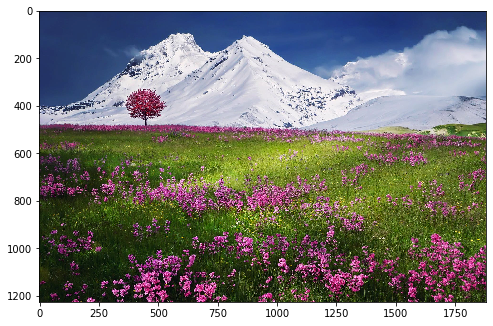

In [6]:
snow = img_as_float(io.imread('images/snow.jpg'))

plt.figure(figsize=(8,8))
plt.imshow(snow)

In [7]:
noise = np.ones_like(snow)*0.4*(snow.max() - snow.min())

noise[np.random.random(size=noise.shape)>0.7] *= -1

In [8]:
def mse(x,y):
    return np.linalg.norm(x-y)
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


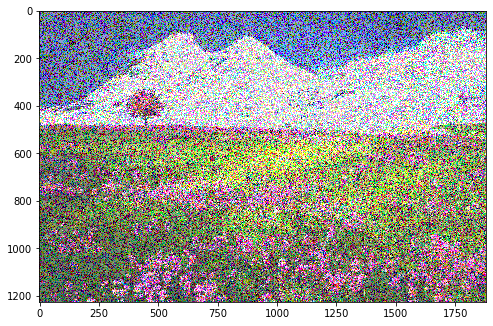

In [9]:
snow_noisy = snow+noise

plt.figure(figsize=(8,8))
plt.imshow(snow_noisy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


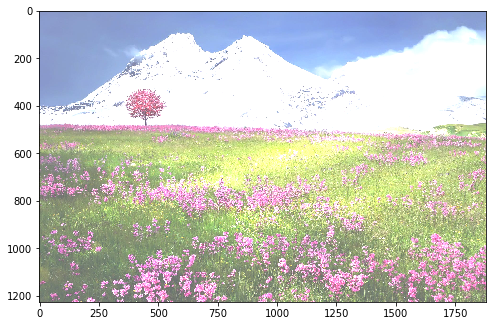

In [10]:
snow_noisy_constant = snow + abs(noise)

plt.figure(figsize=(8,8))
plt.imshow(snow_noisy_constant)

In [11]:
mse_none = mse(snow, snow)

ssim_none = ssim(snow, snow, multichannel=True, data_range = snow.max()-snow.min())

C:\Users\NEHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
mse_noise = mse(snow, snow_noisy)

ssim_noise = ssim(snow, snow_noisy, multichannel=True, data_range = snow_noisy.max()-snow_noisy.min())

C:\Users\NEHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
mse_noise_constant = mse(snow, snow_noise_constant)

ssim_noise_constant = ssim(snow, snow_noisy_constant, multichannel=True, data_range = snow_noisy_constant.max()-snow_noisy_constant.min())

NameError: name 'snow_noise_constant' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


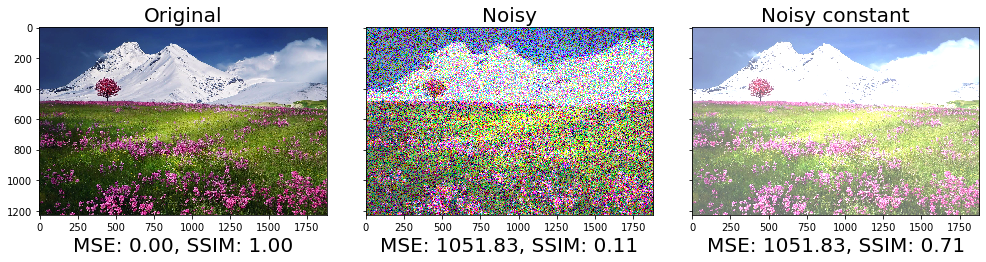

In [21]:
fig, ax = plt.subplots(1,3,figsize=(14,6), sharex=True, sharey=True)

ax=ax.ravel()

label = 'MSE: {:.2f}, SSIM: {:.2f}'
ax[0].imshow(snow)
ax[0].set_xlabel(label.format(mse_none, ssim_none), fontsize=20)
ax[0].set_title('Original', fontsize=20)

ax[1].imshow(snow_noisy)
ax[1].set_xlabel(label.format(mse_noise, ssim_noise), fontsize=20)
ax[1].set_title('Noisy', fontsize=20)

ax[2].imshow(snow_noisy_constant)
ax[2].set_xlabel(label.format(mse_noise_constant, ssim_noise_constant), fontsize=20)
ax[2].set_title('Noisy constant', fontsize=20)

fig.tight_layout()
plt.show()